# Credit Prediction Task - Internship Project


###  Objective: Predict whether a loan applicant is likely to default on a loan

# 📊 Dataset Description
#### This dataset contains demographic and financial details of loan applicants. Key features include:
##### - Gender, Married, Dependents, Education
##### - ApplicantIncome, CoapplicantIncome
##### - LoanAmount, Loan_Amount_Term, Credit_History
##### - Property_Area, Loan_Status (Target)


# ------------------------------------------
# ✅ Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# ------------------------------------------
# ✅ Step 2: Load Dataset
# Dataset Source: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset
# File name : 'loan_data.csv'

In [2]:
df = pd.read_csv("Load_data.csv")

# ------------------------------------------
# ✅ Step 3: Basic Exploration

In [3]:
df.shape


(982, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


# ------------------------------------------
# ✅ Step 4: Handle Missing Values

In [6]:
print("\nMissing values before:")
print(df.isnull().sum())

# Fill numerical columns
num_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to numeric
    df[col] = df[col].fillna(df[col].median())         # fill NaN with median

# Fill categorical columns
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])        # fill NaN with mode
    
    # Drop rows with missing target (Loan_Status)
df = df.dropna(subset=['Loan_Status'])  # essential to remove rows with no label


print("\nMissing values after:")
print(df.isnull().sum())


Missing values before:
Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          368
dtype: int64

Missing values after:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [7]:

#  Data Type Correction for Consistency
# Converting 'Dependents' to integer and handling '3+' case,
# and ensuring numeric columns are properly converted for analysis/modeling.

df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)


# Convert income-related columns to numeric (if any entries are non-numeric)
df['LoanAmount'] = pd.to_numeric(df['LoanAmount'], errors='coerce')
df['ApplicantIncome'] = pd.to_numeric(df['ApplicantIncome'], errors='coerce')
df['CoapplicantIncome'] = pd.to_numeric(df['CoapplicantIncome'], errors='coerce')


In [ ]:
#df.fillna(method='ffill', inplace=True)


# ------------------------------------------
# ✅ Step 5: Data Visualization

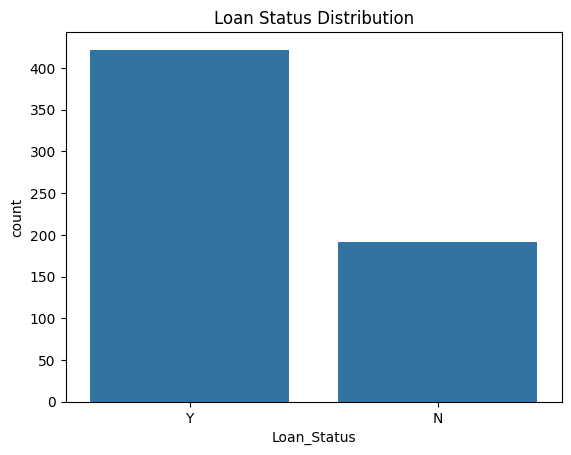

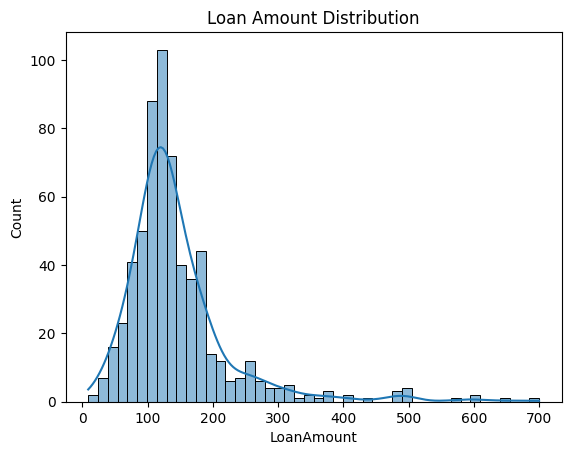

In [8]:
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.show()

sns.histplot(df['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()




In [9]:
# Ensure LoanAmount is numeric (convert if not)
df['LoanAmount'] = pd.to_numeric(df['LoanAmount'], errors='coerce')

# Now safely fill with median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())




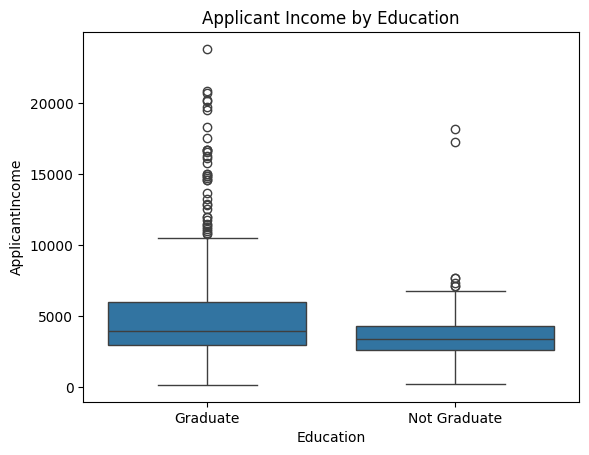

In [10]:
# Convert ApplicantIncome to numeric (ignore non-numeric entries)
df['ApplicantIncome'] = pd.to_numeric(df['ApplicantIncome'], errors='coerce')

# Now drop any rows where it became NaN
df.dropna(subset=['ApplicantIncome'], inplace=True)

# Then filter for outlier removal
filtered_df = df[df['ApplicantIncome'] < 25000]

#
sns.boxplot(x='Education', y='ApplicantIncome', data=filtered_df)
plt.title('Applicant Income by Education')
plt.show()


# ------------------------------------------
# ✅ Step 6: Encode And Feature Scalling, 

In [11]:
columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', ]
le = LabelEncoder()
for column in columns:
    df[column] = le.fit_transform(df[column])


# Encode target variable
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

# Define features and target
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# 🧪 Feature Scaling: Scale only after all encoding is done
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------
# ✅ Step 7: Train-Test Split

In [12]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



# ------------------------------------------
# ✅ Step 8: Train Model

In [13]:

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)


# ------------------------------------------
# ✅ Step 9: Predictions and Evaluation

In [14]:
y_pred = model.predict(X_test)
y_pred



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

Text(0.5, 1.0, 'Confusion Matrix - Loan Prediction')

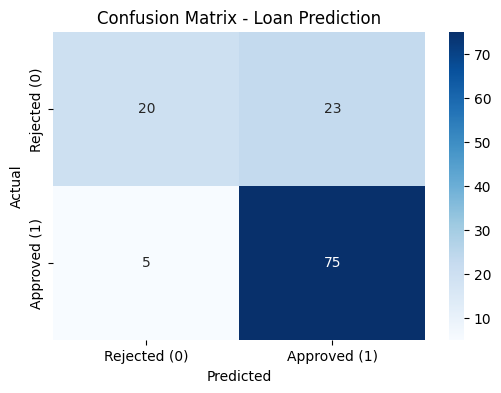

In [15]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected (0)', 'Approved (1)'],
            yticklabels=['Rejected (0)', 'Approved (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Loan Prediction')

In [16]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7723577235772358

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.47      0.59        43
           1       0.77      0.94      0.84        80

    accuracy                           0.77       123
   macro avg       0.78      0.70      0.72       123
weighted avg       0.78      0.77      0.75       123




#### -  Conclusion

##### - Logistic Regression model achieved ~77% accuracy.
##### - High recall for approved loans (94%) — good for minimizing false negatives.
##### - Some false positives exist — may misclassify rejected applicants.
##### - Good baseline model for credit risk prediction.

